# Ebay car sales data analysis

This is the first project I've decided to publish. After an intense few weeks of studying around 40 hrs a week, I've noticed my retention is dropping. Decided to redo some of my first projects, just to remind myself what I've learned. Apart from doing the usual data cleaning as requested by Dataquest for this project, **I have chalanged myself to do a few additional tasks:**
- [extracted engine size from 'name' column](#engine19) where it was easily achieveble (in about 14500 rows)
- filled 4000 cells of [power column with average power value](#fillpower181) for each brand respectively (instead of filling it with an average power value for the whole database)
- inspected rows with ['sontiage_autos'](#brands15) brand and reassigned 80% of these entries to their correct brand
- came across [faulty data](#analyze20) in post-2015 entries (and removed it)
- plotted average price data on the [map of Germany](#location26)

**Links:**
[Dataset](https://github.com/grumpyclimber/portfolio/blob/main/ebay/autos.csv) [My Github](https://github.com/grumpyclimber/portfolio) [My LinkedIn](https://www.linkedin.com/in/adam-kubalica-787a79220/)

# Full index:
* [1. Data inspection and cleaning](#inspect_clean1) 
    * 1.1.   [General info](#general11) 
    * 1.2.   [Column names](#column_names12) 
    * 1.3.   [Odometer column](#odometer13) 
    * 1.4.   [Price column](#price14)  
        * 1.4.1. [Inspecting expensive cars](#expensive141) 
        * 1.4.2. [Inspecting low prices](#lowprices142) 
    * 1.5.   [Brands - sonstige_autos](#brands15)  
    * 1.6.   [Dates](#dates16) 
    * 1.7.   [Registration year column](#registration17)  
    * 1.8.   [Power](#power18) 
        * 1.8.1. [Filling in the missing power values](#fillpower181) 
    * 1.9. [Engine size](#engine19)
    
* [2. Lets start analyzing](#analyze20) 
    * 2.1. [How cars change](#change21) 
    * 2.2. [back to brands](#brands22) 
        * 2.2.1. [Brands with unrepaired damage](#repair221) 
    * 2.3. [Power and engine size](#powerengine23) 
    * 2.4. [Are engines becoming more efficient?](#efficient24) 
        * 2.4.1. [Which models are the most power efficient?](#models241) 
    * 2.5. [Gearbox](#gearbox25) 
    * 2.6. [Location](#location26) 
    * 2.7. [Conclusions](#last27)




In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import os

<a id='inspect_clean1'></a>

# 1. Data inspection and cleaning

In this part of the project, we'll focus on removing unnecessary data and filling in missing values.

# 1.1. General info

In [2]:
autos = pd.read_csv('autos.csv',  encoding="Latin-1")

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


<a id='column_names12'></a>

## 1.2. Column names
Column names are in camelcase. The first change We'll apply is to modify the column names to snakecase. We'll discuss individual columns after that change is done.


In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

now we can edit that list below:

In [6]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power', 'model',
       'odometer', 'registration_month', 'fuel', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_pictures', 'postal_code',
       'last_seen']

In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer,registration_month,fuel,brand,unrepaired_damage,ad_created,nr_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Now we can finally discuss individual columns:
- date_crawled containt date and time, we can extract just the date from these cells.
- **name looks very interesting, it contains brand, model, and sometimes engine size, maybe We'll be able to extract engine size for some entries from this column**
- seller and offer_type has just 2 values(including nan), so does abtest (but abtest may have some influence on price)
- price is in text format, which We'll convert to numeric value
- vehicle_type has 8 types, seems reasonable 
- registration_year will require some work,  years like (1000 or 9999) are not valid registration dates.
- gearbox has only 2 values, which sound correct, it will be interesting to track the share of automatic gearboxes as years pass
- power has some major discrepencies similar to registration_year column, 0 or 17700 are not valid entries
- odometer is in text format, which I will convert into numeric value
- nr_pictures has no entries, We'll remove that column



Lets remove unnecesary columns:

In [8]:
autos.drop(['nr_pictures', 'seller', 'offer_type'], axis=1, inplace=True)

<a id='odometer13'></a>

# 1.3. Odometer column
contains string values, lets replace them with numeric values:

In [9]:
autos['odometer'] = autos['odometer'].str.replace('km', '', regex=False)
autos['odometer'] = autos['odometer'].str.replace(',', '', regex=False)
autos['odometer'] = autos['odometer'].astype(float)
autos['odometer'].value_counts()

150000.0    32424
125000.0     5170
100000.0     2169
90000.0      1757
80000.0      1436
70000.0      1230
60000.0      1164
50000.0      1027
5000.0        967
40000.0       819
30000.0       789
20000.0       784
10000.0       264
Name: odometer, dtype: int64

As shown above , there are no cars with more than 150000 kms on the clock in the database. 

<a id='price14'></a>

# 1.4. Price column
Lets remove a few characters from price column, so that we can convert it to a numeric value. 

In [10]:
autos['price'] = autos['price'].str.replace('$', '', regex=False)
autos['price'] = autos['price'].str.replace(',', '', regex=False)
autos['price'] = autos['price'].astype(float)
autos['price'].value_counts()

0.0        1421
500.0       781
1500.0      734
2500.0      643
1000.0      639
           ... 
414.0         1
79933.0       1
5198.0        1
18890.0       1
16995.0       1
Name: price, Length: 2357, dtype: int64

<a id='expensive141'></a>

## 1.4.1. inspecting expensive cars

In [11]:
autos.sort_values(by='price',ascending=False)[:15]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer,registration_month,fuel,brand,unrepaired_damage,ad_created,postal_code,last_seen
39705,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,99999999.0,control,limousine,1999,automatik,224,s_klasse,150000.0,9,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,73525,2016-04-06 05:15:30
42221,2016-03-08 20:39:05,Leasinguebernahme,27322222.0,control,limousine,2014,manuell,163,c4,40000.0,2,diesel,citroen,NaN,2016-03-08 00:00:00,76532,2016-03-08 20:39:05
27371,2016-03-09 15:45:47,Fiat_Punto,12345678.0,control,NaN,2017,NaN,95,punto,150000.0,0,NaN,fiat,NaN,2016-03-09 00:00:00,96110,2016-03-09 15:45:47
39377,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,12345678.0,control,NaN,2018,manuell,95,v40,150000.0,6,NaN,volvo,nein,2016-03-08 00:00:00,14542,2016-04-06 23:17:31
47598,2016-03-31 18:56:54,Opel_Vectra_B_1_6i_16V_Facelift_Tuning_Showcar...,12345678.0,control,limousine,2001,manuell,101,vectra,150000.0,3,benzin,opel,nein,2016-03-31 00:00:00,4356,2016-03-31 18:56:54
2897,2016-03-12 21:50:57,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,11111111.0,test,limousine,1973,manuell,48,escort,50000.0,3,benzin,ford,nein,2016-03-12 00:00:00,94469,2016-03-12 22:45:27
24384,2016-03-21 13:57:51,Schlachte_Golf_3_gt_tdi,11111111.0,test,NaN,1995,NaN,0,NaN,150000.0,0,NaN,volkswagen,NaN,2016-03-21 00:00:00,18519,2016-03-21 14:40:18
11137,2016-03-29 23:52:57,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,10000000.0,control,coupe,1960,manuell,368,NaN,100000.0,1,benzin,sonstige_autos,nein,2016-03-29 00:00:00,73033,2016-04-06 21:18:11
47634,2016-04-04 21:25:21,Ferrari_FXX,3890000.0,test,coupe,2006,NaN,799,NaN,5000.0,7,NaN,sonstige_autos,nein,2016-04-04 00:00:00,60313,2016-04-05 12:07:37
7814,2016-04-04 11:53:31,Ferrari_F40,1300000.0,control,coupe,1992,NaN,0,NaN,50000.0,12,NaN,sonstige_autos,nein,2016-04-04 00:00:00,60598,2016-04-05 11:34:11


The first 7 rows are not real prices. We can tell that by looking on the numbers(12345678) or the car models - Fiat Punto is not worth THAT much.


Maseratti from the 60ties is the first entry worthy of a google search to confirm its value. Seems its of by 1 zero, so we are not going to keep that entry. **The Ferrari_FXX priced for 3 890 000** is the first trustworthy entry. Few rows further down the list we can see **Porsche 911**. Anything cheaper than Porsche seems genuine, above that price though, we have a few cars between Porsche and Ferraris that need attention:

In [12]:
autos = autos[autos['price'] <= 3890000.0]
#once more we can see cars priced at 12345... and 999999.. lets remove those entries:
autos = autos[(autos['price'] != 1234566.0) & (autos['price'] != 999999.0) & (autos['price'] != 999990.0)]
autos.sort_values(by='price',ascending=False)[:10]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer,registration_month,fuel,brand,unrepaired_damage,ad_created,postal_code,last_seen
47634,2016-04-04 21:25:21,Ferrari_FXX,3890000.0,test,coupe,2006,NaN,799,NaN,5000.0,7,NaN,sonstige_autos,nein,2016-04-04 00:00:00,60313,2016-04-05 12:07:37
7814,2016-04-04 11:53:31,Ferrari_F40,1300000.0,control,coupe,1992,NaN,0,NaN,50000.0,12,NaN,sonstige_autos,nein,2016-04-04 00:00:00,60598,2016-04-05 11:34:11
36818,2016-03-27 18:37:37,Porsche_991,350000.0,control,coupe,2016,manuell,500,911,5000.0,3,benzin,porsche,nein,2016-03-27 00:00:00,70499,2016-03-27 18:37:37
14715,2016-03-30 08:37:24,Rolls_Royce_Phantom_Drophead_Coupe,345000.0,control,cabrio,2012,automatik,460,NaN,20000.0,8,benzin,sonstige_autos,nein,2016-03-30 00:00:00,73525,2016-04-07 00:16:26
34723,2016-03-23 16:37:29,Porsche_Porsche_911/930_Turbo_3.0__deutsche_Au...,299000.0,test,coupe,1977,manuell,260,911,100000.0,7,benzin,porsche,nein,2016-03-23 00:00:00,61462,2016-04-06 16:44:50
35923,2016-04-03 07:56:23,Porsche_911_Targa_Exclusive_Edition__1_von_15_...,295000.0,test,cabrio,2015,automatik,400,911,5000.0,6,benzin,porsche,nein,2016-04-03 00:00:00,74078,2016-04-03 08:56:20
12682,2016-03-28 22:48:01,Porsche_GT3_RS__PCCB__Lift___grosser_Exklusiv_...,265000.0,control,coupe,2016,automatik,500,911,5000.0,3,benzin,porsche,nein,2016-03-28 00:00:00,70193,2016-04-05 03:44:51
47337,2016-04-05 10:25:38,BMW_Z8_roadster,259000.0,test,cabrio,2001,manuell,400,z_reihe,20000.0,6,benzin,bmw,nein,2016-04-05 00:00:00,61462,2016-04-05 12:07:32
38299,2016-03-28 22:25:25,Glas_BMW_mit_Wasser,250000.0,test,NaN,2015,NaN,0,x_reihe,5000.0,0,NaN,bmw,NaN,2016-03-28 00:00:00,60489,2016-03-28 22:25:25
37840,2016-03-21 10:50:12,Porsche_997,220000.0,test,coupe,2008,manuell,415,911,30000.0,7,benzin,porsche,nein,2016-03-21 00:00:00,69198,2016-04-06 04:46:14


# Sidenote: what is sonstige_autos?
While cleaning the price columns, we've noticed that lots of prestige cars don't have a correct brand value. To give an example: Ferrari fxx is manufactured by Ferrari not sonstige_autos(we are going to deal with that later). 

<a id='lowprices142'></a>

# 1.4.2. Low prices
Back to cleaning the price column: lets look at low prices

In [13]:
autos.sort_values(by='price',ascending=True).head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer,registration_month,fuel,brand,unrepaired_damage,ad_created,postal_code,last_seen
14447,2016-03-23 22:56:32,Hochzeitsauto_Oldtimer_Citroen_2CV_Ente_Hochze...,0.0,test,kleinwagen,1987,manuell,0,andere,20000.0,0,benzin,citroen,nein,2016-03-23 00:00:00,55286,2016-04-06 17:16:16
27020,2016-03-31 16:38:27,wollen_Sie_Ihr_Auto_Verkaufen___wir_Kaufen_KFZ_an,0.0,control,NaN,2007,NaN,0,andere,150000.0,7,NaN,mazda,ja,2016-03-31 00:00:00,13467,2016-03-31 16:38:27
43035,2016-03-18 16:38:17,Schlachten_oder_komplett,0.0,test,kombi,2002,manuell,0,laguna,150000.0,0,diesel,renault,ja,2016-03-18 00:00:00,27327,2016-04-05 22:18:56
43034,2016-03-22 16:37:19,Audi_a4_mit_2_Jahren_TÜV_und_abnehmbare_ahk,0.0,test,limousine,1998,manuell,0,a4,150000.0,3,benzin,audi,nein,2016-03-22 00:00:00,50181,2016-03-25 08:45:14
27096,2016-03-22 00:51:42,Ich_suche_Autos_fuer_Export_bitte_melden...,0.0,control,NaN,2011,NaN,0,NaN,150000.0,0,NaN,sonstige_autos,NaN,2016-03-22 00:00:00,63065,2016-03-22 01:32:21


In [14]:
#lets remove anything cheaper than 500 dollars
autos = autos[autos['price'] > 500]

<a id='brands15'></a>

## 1.5. Brands - sonstige_autos
While inspecting expensive cars we've noticed some cars have an incorrect brand value: sonstige_autos, we're going to address that issue now.

In [15]:
autos[autos['brand'] == 'sonstige_autos']['name'].value_counts()[:5]

Dodge_RAM              6
MG_MGF_1.8i            5
Hummer_H2              4
Cadillac_Deville       3
Abarth_Grande_Punto    3
Name: name, dtype: int64

In [16]:
autos[autos['brand'] == 'sonstige_autos']['name'].value_counts().sum()

429

429 entries have a 'brand' value 'sonstige_autos'. It's not much and we could take the easy way of just removing these rows. But lets not forget how we came across this brand - we were inspecting the most expensive cars. We'd be removing lots of entries with price and power values way above average. 

In [17]:
autos['price'].mean()

6540.057899724717

In [18]:
autos[autos['brand'] == 'sonstige_autos']['price'].mean()

25414.662004662005

As we can see above, the average price for cars branded sonstige_autos is almost 4 times higher than the average price for the whole database! If we remove those entries, we are going to remove significant portion of top-end cars.

Lets try to extract the correct brand from 'name' column:

In [19]:
#create a column s_brand for extracting sonstige_autos brand names
pattern = r"(^.*?)(?=_)"
autos['s_brand'] = autos[autos['brand'] == 'sonstige_autos']['name'].str.extract(pattern)
autos['s_brand'] = autos['s_brand'].str.lower()
# now we don't want to list a brand if it has only 1 element in the entire database, so lets cut it of at 40:
autos['s_brand'].value_counts()[:40]

dodge          47
mg             26
cadillac       24
lexus          21
suche          18
wartburg       15
andere         15
maserati       14
pontiac        13
ssangyong      12
triumph        12
corvette       11
abarth         10
alpina          9
iveco           9
hummer          6
plymouth        6
verkaufe        5
gmc             5
piaggio         5
vw              4
bentley         4
nsu             4
rolls           4
buick           4
ferrari         4
microcar        4
mopedauto       4
oldsmobile      3
lotus           3
barkas          3
buggy           3
lincoln         3
tesla           3
aixam           3
auto            3
dkw             2
talbot          2
ac              2
strandbuggy     2
Name: s_brand, dtype: int64

Some of the above are genuine brands, others are just german words...(Verkaufe, Suche, Andere,Zu, Microcar), 
Corvette is not a brand, whereas vw is Volkswagen.

In [20]:
autos['s_brand'] = autos['s_brand'].str.replace('corvette', 'chevrolet')
autos['s_brand'] = autos['s_brand'].str.replace('vw', 'volkswagen')

In [21]:
#if we only do the first 40, we'll update 348 entries:
autos['s_brand'].value_counts()[:40].sum()

348

In [22]:
# out of 426 entries
autos['s_brand'].value_counts().sum()

426

In [23]:
#lets create a list with only brands names from the above value counts:
list_of_top40 = autos['s_brand'].value_counts().index.tolist()[:40]
# lets remove a few german words from that list:
list_to_remove = ['verkaufe','suche','andere','zu','microcar']
list_of_top40 = [ele for ele in list_of_top40 if ele not in list_to_remove]

In [24]:
#some of these brands are already in the dataframe, but out of curiosity, we'll check how many unique brands
#the database has before and after
len(autos['brand'].value_counts())

40

In [25]:
#lets create a bool mask only for sonstige_autos and only for the most popular 40 of sonstige_autos
# then assign a different value to that col
autos.loc[(autos['brand'] == 'sonstige_autos') & (autos['s_brand'].isin(list_of_top40)), 'brand'] = autos['s_brand']

In [26]:
len(autos['brand'].value_counts())

73

What's left?

In [27]:
autos[autos['brand'] == 'sonstige_autos']

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer,registration_month,fuel,brand,unrepaired_damage,ad_created,postal_code,last_seen,s_brand
152,2016-03-20 12:45:01,Ssanyong_Rexton_2.7,4499.0,test,suv,2005,automatik,163,NaN,150000.0,9,diesel,sonstige_autos,nein,2016-03-20 00:00:00,73312,2016-03-25 11:45:09,ssanyong
625,2016-03-09 22:50:54,Werkaufen_meine_Iveco_deily,4000.0,test,bus,2001,manuell,0,NaN,150000.0,11,diesel,sonstige_autos,NaN,2016-03-09 00:00:00,68647,2016-03-16 13:15:30,werkaufen
1179,2016-03-18 09:39:30,Andere_russ._LuAZ_967M_Schwimmwagen_NVA_GSSD_a...,3999.0,control,suv,1987,manuell,71,NaN,5000.0,6,benzin,sonstige_autos,nein,2016-03-18 00:00:00,1589,2016-03-22 10:44:44,andere
1548,2016-03-25 14:46:44,1936_Daimler_Fifteen_Special_Projekt,7999.0,control,NaN,1960,NaN,65,NaN,150000.0,6,benzin,sonstige_autos,NaN,2016-03-25 00:00:00,50259,2016-04-06 17:46:36,1936
1763,2016-03-09 18:37:55,DKW_1000_S_Coupe,9000.0,test,coupe,1963,manuell,40,NaN,80000.0,4,benzin,sonstige_autos,nein,2016-03-09 00:00:00,31787,2016-04-06 18:16:34,dkw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48195,2016-03-07 14:51:27,Sang_Yong_mercedes,850.0,control,suv,1996,automatik,136,NaN,125000.0,4,benzin,sonstige_autos,NaN,2016-03-07 00:00:00,71263,2016-03-07 14:51:27,sang
48287,2016-03-27 00:36:40,Suche_Kleinwagen!!!,1000.0,test,kleinwagen,2000,NaN,60,NaN,150000.0,0,NaN,sonstige_autos,nein,2016-03-27 00:00:00,61209,2016-04-07 04:45:59,suche
48818,2016-03-25 10:46:24,Caterham_Lotus_Super_Seven_Linkslenker_mit_gru...,20950.0,test,cabrio,1992,manuell,86,NaN,40000.0,6,benzin,sonstige_autos,nein,2016-03-25 00:00:00,31224,2016-03-31 17:15:34,caterham
48946,2016-03-05 16:57:05,Unfallwagen_Motorschaden_Getriebeschaden_Ankau...,10000.0,control,NaN,1990,NaN,0,NaN,150000.0,1,NaN,sonstige_autos,NaN,2016-03-05 00:00:00,45884,2016-03-05 18:17:58,unfallwagen


125 rows, we can clearly see we are missing some real gems here (Gallardo, Caterham, 1936 Daimler) unfortunately , we'd have to manually go and check each entry to make sure it's a genuine car model, on top of that they're most likely the only representatives for their brands, we can drop the s_brand column, and remove the remaining sontiage_autos cars:

In [28]:
autos = autos.drop(columns='s_brand')
autos = autos[autos['brand'] != 'sonstige_autos']
# While we're removing the remaining sontiage_autos brands, lets cut down the mercedes_benz name:
autos['brand'] = autos['brand'].str.replace('mercedes_benz','mercedes')

<a id='dates16'></a>

## 1.6. Dates 
We don't need to store and present the exact time in any of the date columns, we'll just keep the dates:

In [29]:
autos['date_crawled'] = autos['date_crawled'].str[:10]
autos['ad_created'] = autos['ad_created'].str[:10]
autos['last_seen'] = autos['last_seen'].str[:10]

In [30]:
autos['ad_created'].value_counts().sort_index(ascending=False)[:5]

2016-04-07      54
2016-04-06     144
2016-04-05     530
2016-04-04    1638
2016-04-03    1726
Name: ad_created, dtype: int64

<a id='registration17'></a>

## 1.7. registration_year column
We can observe a big discrepency in registration years: 
1000 AD? or 9999? In the future? 

In [31]:
autos['registration_year'].describe()

count    44193.000000
mean      2004.952685
std         82.766731
min       1000.000000
25%       2000.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

lets see how things look if we remove anything below 1900:

In [32]:
autos = autos[(autos['registration_year'] > 1900) & (autos['registration_year'] < 2018)]
autos['registration_year'].value_counts().sort_index(ascending=False)
autos.sort_values(by='registration_year',ascending=True)[:5]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer,registration_month,fuel,brand,unrepaired_damage,ad_created,postal_code,last_seen
28693,2016-03-22,Renault_Twingo,599.0,control,kleinwagen,1910,manuell,0,NaN,5000.0,0,benzin,renault,NaN,2016-03-22,70376,2016-04-06
21416,2016-03-12,Essex_super_six__Ford_A,16500.0,control,cabrio,1927,manuell,40,andere,5000.0,5,benzin,ford,NaN,2016-03-12,74821,2016-03-15
22101,2016-03-09,BMW_Andere,11500.0,test,cabrio,1929,manuell,15,andere,5000.0,1,NaN,bmw,ja,2016-03-09,70569,2016-04-07
11246,2016-03-26,Ford_Model_A_Roadster_Deluxe_1931,27500.0,control,cabrio,1931,manuell,39,andere,10000.0,7,benzin,ford,nein,2016-03-26,9322,2016-04-06
2221,2016-03-15,Sehr_seltener_Oldtimer_Opel_1210_zum_Restaurieren,3350.0,control,andere,1934,manuell,0,andere,5000.0,0,benzin,opel,ja,2016-03-15,49828,2016-04-06


As we can see above, even though we've narrowed down the registration year values to 1900 and above, we still have to pay attention. **Opel Corsa or Renault Twingo were not cruising around european roads before World War 2**. Fords look ok, BMW doesn't have a full name to verify its model but the 'power' value points to a very old(and very low on power) car, so we're assuming that it's a correct entry. Thus lets remove everything before 1927:

In [33]:
autos = autos[(autos['registration_year'] >= 1927)]
autos['registration_year'] = autos['registration_year'].astype(int)

<a id='power18'></a>

# 1.8. Power

What's a car without power? Though we can clearly see that in some cases, cars in the database claim to have **way to much or no power at all!**

In [34]:
autos['power'].describe()

count    43720.000000
mean       122.656702
std        194.132480
min          0.000000
25%         75.000000
50%        113.000000
75%        150.000000
max      17700.000000
Name: power, dtype: float64

Lets assume that a reasonable upper border is 800 bhp, check how many cars are more powerful:

In [35]:
len(autos[autos['power'] > 800])

52

Thats a number we can remove from this database:

There's a very small chance that all of them are Bugatti Veyrons and similar cars with insane amounts of power (above 800 bhp). We could display, those 52 entries and give it a quick look, but checking their average price should be faster:

In [36]:
autos[autos['power'] > 800]['price'].mean()

4591.576923076923

**Cars with more than 800 bhp don't sell for 4600 dollars(on average).** That's a good enough proof that most of the 52 cars we're about to remove are not high-end powerful cars, the're just cars with incorrect power values.

In [37]:
# lets remove anything more powerful than 800 bhp:
autos.drop(autos.loc[autos['power'] >= 800].index, inplace=True)

In [38]:
autos.sort_values('power', ascending=False)[:10]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer,registration_month,fuel,brand,unrepaired_damage,ad_created,postal_code,last_seen
47634,2016-04-04,Ferrari_FXX,3890000.0,test,coupe,2006,NaN,799,NaN,5000.0,7,NaN,ferrari,nein,2016-04-04,60313,2016-04-05
40693,2016-03-08,Audi_RS6_Avant,21400.0,control,kombi,2008,automatik,740,andere,150000.0,6,benzin,audi,nein,2016-03-08,83229,2016-03-08
44410,2016-04-04,SKODA_FABIA_1_2_HTP_EASY/2.HAND/SCHECKH./TÜV_B...,4300.0,control,NaN,2016,manuell,696,fabia,150000.0,2,benzin,skoda,nein,2016-04-04,4838,2016-04-06
24236,2016-03-23,Peugeot_107_Sondermodell_4_5_Liter_auf_100_km_...,3999.0,test,kleinwagen,2009,manuell,682,NaN,70000.0,1,benzin,peugeot,nein,2016-03-23,86609,2016-04-02
30172,2016-04-01,Fiat_500,12000.0,test,kleinwagen,1967,manuell,678,500,30000.0,6,benzin,fiat,nein,2016-04-01,63762,2016-04-01
49085,2016-04-04,Dodge_Unfall_Viper_SRT_10_mit_8.4_Liter__650_PS,23900.0,control,cabrio,2008,manuell,650,NaN,40000.0,7,benzin,dodge,ja,2016-04-04,51061,2016-04-06
9335,2016-03-20,Golf_3_Vr6_Turbo_4Motion_640PS,18000.0,test,coupe,1997,manuell,640,golf,125000.0,10,benzin,volkswagen,NaN,2016-03-20,33613,2016-03-20
16964,2016-04-01,Bentley_Continental_Supersports,105000.0,control,coupe,2010,automatik,630,NaN,80000.0,1,benzin,bentley,nein,2016-04-01,70192,2016-04-05
5342,2016-03-08,Mercedes_Benz_CL_65_AMG_Automatik,23799.0,control,coupe,2010,automatik,612,cl,150000.0,2,benzin,mercedes,nein,2016-03-08,30938,2016-03-08
8446,2016-03-24,Bentley_Continental_Flying_Spur_Speed,79999.0,test,limousine,2011,automatik,610,NaN,60000.0,1,benzin,bentley,nein,2016-03-24,8523,2016-03-30


We've got to the point where some **genuine entries** (Ferrari FXX, Audi RS6, Dodge) **are mixed with obvious mistakes** (Fiesta, Skoda, Peugeot), we have to target them in a bit primitive filter. Otherwise we would have to remove Ferraris from the database, and that's not happening on my watch, if we're working on cars we need a Ferrari in the garage.

In [39]:
autos.drop(autos.loc[(autos['power'] > 650) & (autos['power'] < 740 )].index, inplace=True)
autos.drop(autos.loc[autos['power'] == 754].index, inplace=True)
autos.sort_values('power', ascending=False)[:10]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer,registration_month,fuel,brand,unrepaired_damage,ad_created,postal_code,last_seen
47634,2016-04-04,Ferrari_FXX,3890000.0,test,coupe,2006,NaN,799,NaN,5000.0,7,NaN,ferrari,nein,2016-04-04,60313,2016-04-05
40693,2016-03-08,Audi_RS6_Avant,21400.0,control,kombi,2008,automatik,740,andere,150000.0,6,benzin,audi,nein,2016-03-08,83229,2016-03-08
49085,2016-04-04,Dodge_Unfall_Viper_SRT_10_mit_8.4_Liter__650_PS,23900.0,control,cabrio,2008,manuell,650,NaN,40000.0,7,benzin,dodge,ja,2016-04-04,51061,2016-04-06
9335,2016-03-20,Golf_3_Vr6_Turbo_4Motion_640PS,18000.0,test,coupe,1997,manuell,640,golf,125000.0,10,benzin,volkswagen,NaN,2016-03-20,33613,2016-03-20
16964,2016-04-01,Bentley_Continental_Supersports,105000.0,control,coupe,2010,automatik,630,NaN,80000.0,1,benzin,bentley,nein,2016-04-01,70192,2016-04-05
5342,2016-03-08,Mercedes_Benz_CL_65_AMG_Automatik,23799.0,control,coupe,2010,automatik,612,cl,150000.0,2,benzin,mercedes,nein,2016-03-08,30938,2016-03-08
8446,2016-03-24,Bentley_Continental_Flying_Spur_Speed,79999.0,test,limousine,2011,automatik,610,NaN,60000.0,1,benzin,bentley,nein,2016-03-24,8523,2016-03-30
11433,2016-03-30,Audi_R8_V10_plus_5.2_FSI_quattro_S_tronic_Akra...,175000.0,test,coupe,2016,automatik,610,andere,5000.0,1,benzin,audi,nein,2016-03-30,94244,2016-04-05
32456,2016-03-23,Jaguar_S_Type_R_V8,12500.0,control,limousine,2002,automatik,600,s_type,150000.0,12,NaN,jaguar,nein,2016-03-23,13595,2016-03-30
44929,2016-03-19,Corvette_Singray_7_4,19500.0,test,coupe,1974,automatik,600,andere,5000.0,7,benzin,chevrolet,nein,2016-03-19,38527,2016-03-28


Now the bottom end...lets see how many entries have '0' power.

In [40]:
len(autos[autos['power'] == 0])

3623

that's a lot, we'll try to fill it out

In [41]:
# lets calculate average power for each brand:
brand_names =  autos["brand"].unique()
name_power = autos.groupby('brand').mean()['power']
name_power

brand
abarth        146.600000
ac            182.000000
aixam           3.333333
alfa_romeo    136.507092
alpina        317.111111
                 ...    
trabant        16.468085
triumph        82.000000
volkswagen    100.481037
volvo         143.583127
wartburg       17.785714
Name: power, Length: 72, dtype: float64

In [42]:
len(autos[autos['power'] == 0])
autos2 = autos.copy()

<a id="fillpower181"></a>

# 1.8.1. Filling in the missing power values

This is what I've used initally to fill out the missing values for 'power':
```
mask_0 = autos['power'] == 0
autos['power'] = autos['power'].mask(mask_0, autos['power'].mean())
```
I wasn't happy with it because it wasn't precise. **An average BMW won't have engine power similar to Skoda.** I've wanted to fill those missing values with average power number different for each brand.

So I came up with **this method that's assing average power value depending on the brand:**

In [43]:
# First lets remove anything below 20 horse power, excluding 0:
autos = autos[(autos['power'] == 0) | (autos['power'] > 20)].copy()

In [44]:
#Also lets, check what's the average power value for the whole database(we're expecting) to change that value a bit
power_mean_before = autos['power'].mean()

In [45]:
#Now lets loop over every brand:
brand_names =  autos["brand"].unique()
for car in brand_names:
    mask_car = (autos['power'] == 0) & (autos['brand'] == car)
    mean_power = autos[(autos['brand'] == car) & (autos['power'] != 0)]['power'].mean()
    autos['power'] = autos['power'].mask(mask_car, mean_power)
power_mean_after = autos['power'].mean()

We can check how much the average power value for the whole database changed after we filled those missing 3627 entries.

In [46]:
print('power before:',power_mean_before)
print('power after:',power_mean_after)

power before: 118.82900105441709
power after: 129.15194458438143


<a id='engine19'></a>

# 1.9. Engine size

As mentioned at the very beginning, name column very often **contains engine size of the car**. We'll try to extract the engine size from as many entries as possible. We have to be carefull though, there are a lot of numbers in that column that relate to model number/name and not the actual engine size.

In [47]:
# We're going to try extracting engine size from the cars name
pattern = r"_([1-6][.][0-9])_"
autos['engine_size'] = autos['name'].str.extract(pattern).copy()
autos['engine_size'] = autos['engine_size'].str.replace('.','', regex=True).copy()
# lets create a seperate dataframe for entries with engine size:
power_frame = autos[autos['engine_size'].notnull()].copy()
power_frame['engine_size'] = power_frame['engine_size'].astype(int).copy()/10
power_frame

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer,registration_month,fuel,brand,unrepaired_damage,ad_created,postal_code,last_seen,engine_size
2,2016-03-26,Volkswagen_Golf_1.6_United,8990.0,test,limousine,2009,manuell,102.0,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26,35394,2016-04-06,1.6
5,2016-03-21,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,7900.0,test,bus,2006,automatik,150.0,voyager,150000.0,4,diesel,chrysler,NaN,2016-03-21,22962,2016-04-06,2.8
7,2016-03-16,Golf_IV_1.9_TDI_90PS,1990.0,control,limousine,1998,manuell,90.0,golf,150000.0,12,diesel,volkswagen,nein,2016-03-16,53474,2016-04-07,1.9
13,2016-03-23,Audi_A3_1.6_tuning,1350.0,control,limousine,1999,manuell,101.0,a3,150000.0,11,benzin,audi,nein,2016-03-23,12043,2016-04-01,1.6
14,2016-03-23,Renault_Clio_3__Dynamique_1.2__16_V;_viele_Ver...,3999.0,test,kleinwagen,2007,manuell,75.0,clio,150000.0,9,benzin,renault,NaN,2016-03-23,81737,2016-04-01,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2016-03-22,Audi_A6__S6__Avant_4.2_quattro_eventuell_Tausc...,5000.0,control,kombi,2001,automatik,299.0,a6,150000.0,1,benzin,audi,nein,2016-03-22,46537,2016-04-06,4.2
49995,2016-03-27,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900.0,control,limousine,2011,automatik,239.0,q5,100000.0,1,diesel,audi,nein,2016-03-27,82131,2016-04-01,3.0
49997,2016-04-02,Fiat_500_C_1.2_Dualogic_Lounge,13200.0,test,cabrio,2014,automatik,69.0,500,5000.0,11,benzin,fiat,nein,2016-04-02,73430,2016-04-04,1.2
49998,2016-03-08,Audi_A3_2.0_TDI_Sportback_Ambition,22900.0,control,kombi,2013,manuell,150.0,a3,40000.0,11,diesel,audi,nein,2016-03-08,35683,2016-04-05,2.0


In [48]:
power_frame['brand'].value_counts()[:20]

volkswagen    4211
audi          2317
opel          2092
ford           967
renault        829
skoda          498
seat           448
fiat           425
nissan         254
toyota         250
mazda          238
citroen        226
hyundai        219
alfa_romeo     166
kia            159
suzuki         113
mitsubishi     102
chevrolet       97
honda           87
mercedes        83
Name: brand, dtype: int64

We don't want to analyze data based only on a few samples, that's why we'll only keep the brands with the most amount of entries regarding engine size. We'll keep 20 brands:

In [49]:
power20 = power_frame["brand"].value_counts().index.to_list()[:20]
power20 = power_frame[power_frame["brand"].isin(power20)]
power20["brand"].value_counts()

volkswagen    4211
audi          2317
opel          2092
ford           967
renault        829
skoda          498
seat           448
fiat           425
nissan         254
toyota         250
mazda          238
citroen        226
hyundai        219
alfa_romeo     166
kia            159
suzuki         113
mitsubishi     102
chevrolet       97
honda           87
mercedes        83
Name: brand, dtype: int64

<a id='analyze20'></a>

# 2.&nbsp;Analyzing
At this stage we believe that we've cleaned the important columns and removed the unnecessary entries. Having done 80% of work, it's time to stop cleaning and start analyzing... or have we missed something? Given that now, we can plot power, registration year, price and even engine size in 1/3 of entries. We can start plotting some charts:

In [50]:
for_plot = pd.DataFrame()
for_plot['number of cars'] = autos['registration_year'].value_counts().sort_index()

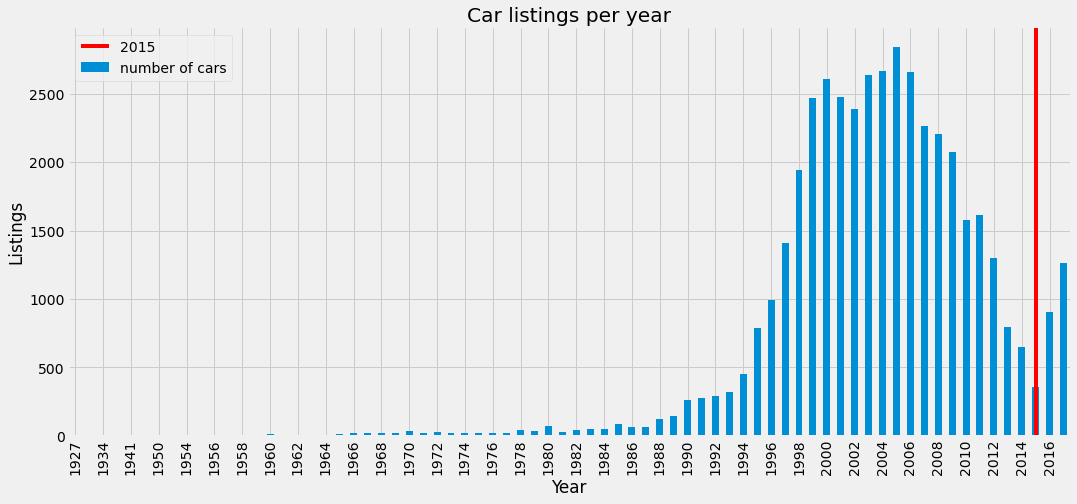

In [51]:
plt.style.use('fivethirtyeight')
for_plot.plot.bar(figsize=(16,7), label='number of cars')
ax2 = plt.subplot()
plt.locator_params(axis='x', nbins=40,)
plt.axvline(69, color='r', label='2015')
plt.legend()
plt.title('Car listings per year')
plt.xlabel('Year')
plt.ylabel('Listings')
for location in [ 'right', 'top']:
            ax2.spines[location].set_visible(False)
plt.show()

<a id='post_2015'></a>

The chart above presents the number of entries per registration year. It's worth noting for the future, that years before 1990 have very small amount of entries. We should rememeber that, when plotting charts. We will ignore earlier entries on most of our charts. But the most important finding is whats happening after 2015. **We can observe an increase in number of cars registered in 2 years after 2015. That may be a sign of further work to be done.** Lets check our suspicions: 

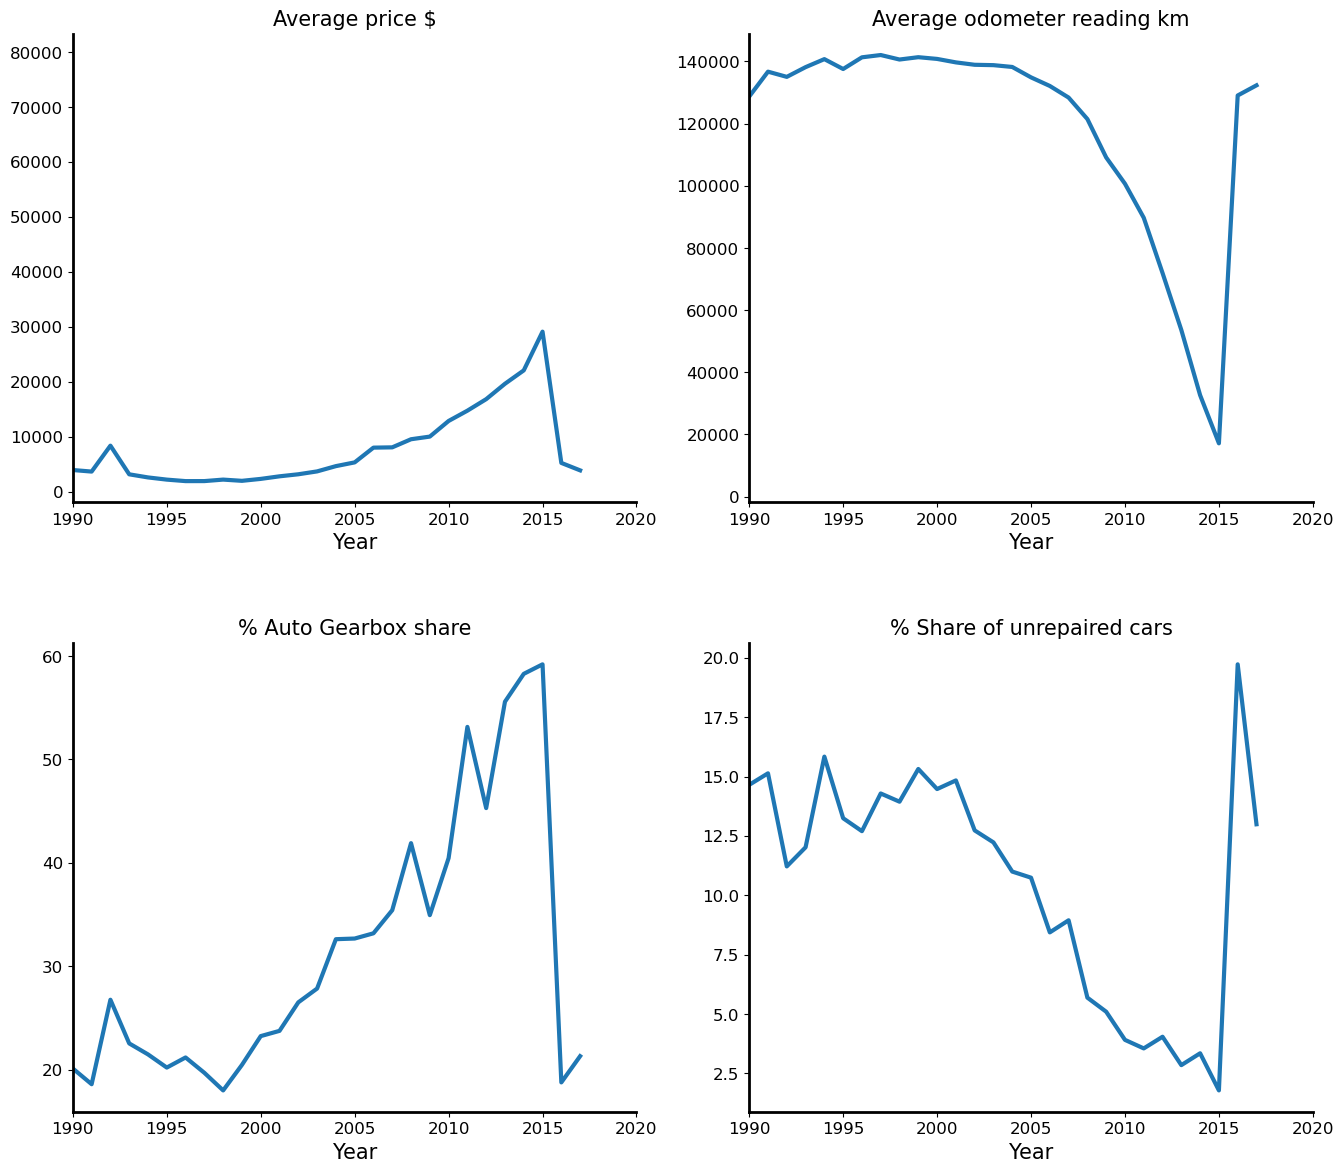

In [52]:
# data for share of automatic gearboxes vs registration year:
empty_dict = {}
for year in range(1990,2018):
    prop = autos[autos["registration_year"] == year]["gearbox"].value_counts()[1] / autos[autos["registration_year"] == year]["gearbox"].value_counts()[0]
    empty_dict[year] = prop * 100
dates = list(empty_dict.keys())           
gearbox = list(empty_dict.values()) 
# data for share of unrepaired cars vs registration year:
empty_dict2 = {} 
for year in range(1990,2018):
    prop = autos[autos["registration_year"] == year]["unrepaired_damage"].value_counts()[1] / autos[autos["registration_year"] == year]["unrepaired_damage"].value_counts()[0]
    empty_dict2[year] = prop * 100
dates2 = list(empty_dict2.keys())           
damage = list(empty_dict2.values()) 
plt.style.use('default')
# plots:
fig, ax = plt.subplots(figsize=(16, 14))
fig.subplots_adjust(hspace=0.3)
ax1 = plt.subplot(221)
autos.groupby('registration_year')['price'].mean().plot.line(linewidth=3)
plt.title('Average price $' ,size=15)
ax2 = plt.subplot(222)
autos.groupby('registration_year')['odometer'].mean().plot.line(linewidth=3)
plt.title('Average odometer reading km' ,size=15)
ax3 = plt.subplot(223)
plt.plot(dates, gearbox, linewidth=3)
plt.title('% Auto Gearbox share' ,size=15)
ax4 = plt.subplot(224)
plt.plot(dates2, damage, linewidth=3)
plt.title('% Share of unrepaired cars' ,size=15)
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    for location in [ 'right', 'top']:
            ax.spines[location].set_visible(False)
    for location in [ 'left', 'bottom']:
            ax.spines[location].set_linewidth(2)
    ax.tick_params(labelsize=12)
    ax.set_xlim(1990,2020)
    ax.set_xlabel('Year',size=15)
plt.show()

We can clearly see a **sudden change in multiple trends occuring in the new cars**. Suddenly cars after 2015 are becoming a lot cheaper, with way higher mileage, more damaged and without automatic gearbox!  All of the 4 charts point to 2015 as the last year of data that's following a trend. Clearly something is wrong with cars registered after 2015. It seems like an overall majority of entries after 2015 is faulty cars with unreliable data. We'll remove everything after 2015:

In [53]:
autos = autos[autos['registration_year']<=2015]
power_frame = power_frame[power_frame['registration_year']<=2015]

After removal of entries post-2015, lets check those charts again:

<a id='change21'></a>

# 2.1. How cars changed over the years

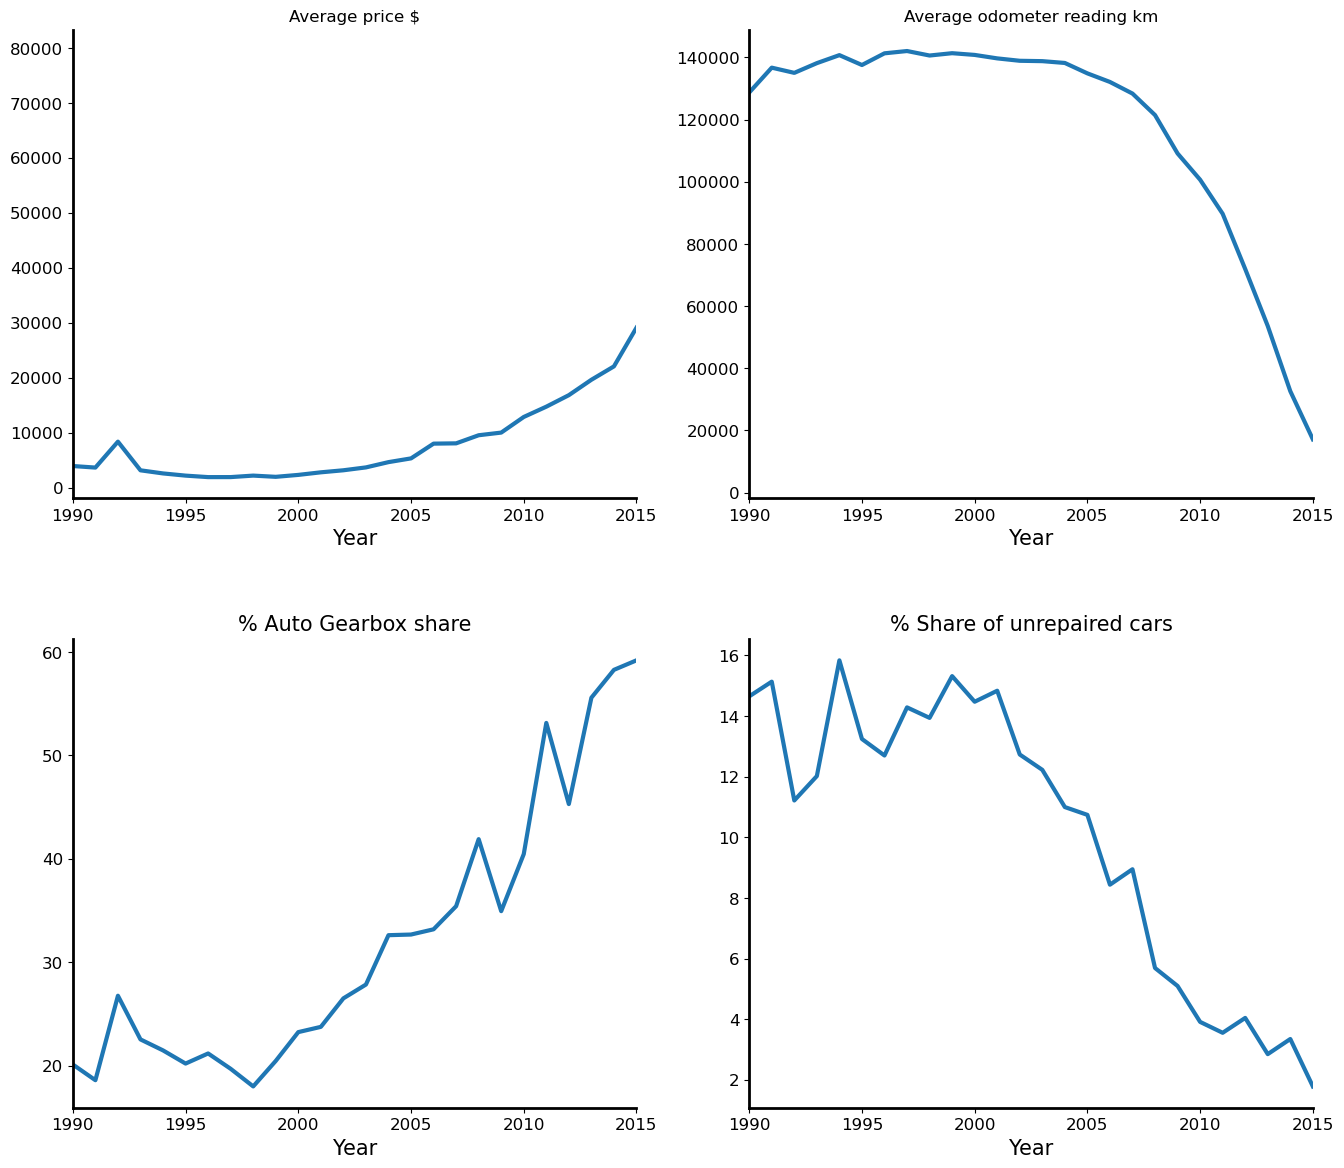

In [54]:
# data for share of automatic gearboxes vs registration year:
empty_dict = {}
for year in range(1990,2016):
    prop = autos[autos["registration_year"] == year]["gearbox"].value_counts()[1] / autos[autos["registration_year"] == year]["gearbox"].value_counts()[0]
    empty_dict[year] = prop * 100
dates = list(empty_dict.keys())           
gearbox = list(empty_dict.values()) 
# data for share of unrepaired cars vs registration year:
empty_dict2 = {}
for year in range(1990,2016):
    prop = autos[autos["registration_year"] == year]["unrepaired_damage"].value_counts()[1] / autos[autos["registration_year"] == year]["unrepaired_damage"].value_counts()[0]
    empty_dict2[year] = prop * 100
dates2 = list(empty_dict2.keys())           
damage = list(empty_dict2.values()) 
# plots:
fig, ax = plt.subplots(figsize=(16, 14))
fig.subplots_adjust(hspace=0.3)
ax1 = plt.subplot(221)
autos.groupby('registration_year')['price'].mean().plot.line(linewidth=3, title='Average price $')
ax2 = plt.subplot(222)
autos.groupby('registration_year')['odometer'].mean().plot.line(linewidth=3, title='Average odometer reading km')
ax3 = plt.subplot(223)
plt.plot(dates, gearbox, linewidth=3)
plt.title('% Auto Gearbox share' ,size=15)
ax4 = plt.subplot(224)
plt.plot(dates2, damage, linewidth=3)
plt.title('% Share of unrepaired cars',size=15)
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    for location in [ 'right', 'top']:
            ax.spines[location].set_visible(False)
    for location in [ 'left', 'bottom']:
            ax.spines[location].set_linewidth(2)   
    ax.tick_params(labelsize=12)
    ax.set_xlim(1990,2015)
    ax.set_xlabel('Year',size=15)
    plt.rcParams['axes.titlesize'] = 16
plt.show()

Having removed the cars from 2016 and 2017, we can observe clear trends in the database:
- price increasing, while age is decreasing
- the newer the car, the less mileage it has
- automatic gearbox share is steadily increasing throughout the years
- older cars have a much higher chance of urepaired damage

<a id='brands22'></a>

# 2.2. Back to brands

In [55]:
pie_frame = pd.DataFrame()
pie_frame['brand'] = autos["brand"]
others = pie_frame['brand'].value_counts()[10:].index
pie_frame.loc[pie_frame['brand'].isin(others),'brand'] = 'other brands'

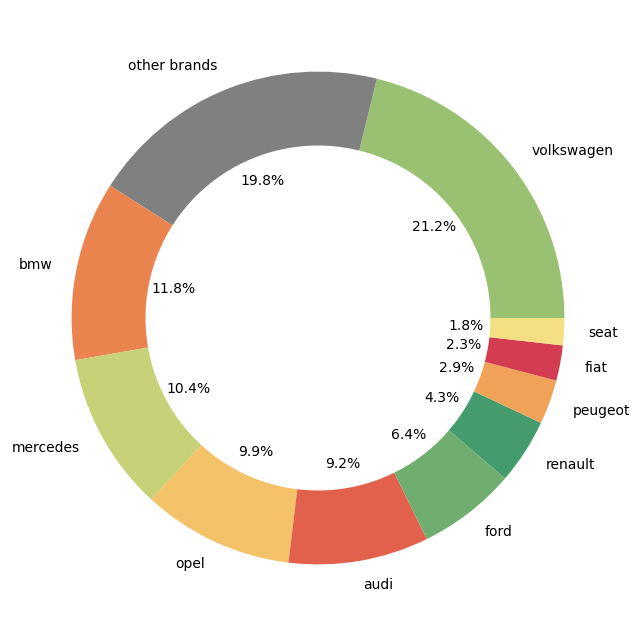

In [56]:
plt.style.use('default')
colors = ['#9ac071', 'grey', '#eb834f', '#c6d178', '#f3c269', '#e2614d',
          '#70ae6f', '#449b6d', '#f0a358', '#d43d51', '#f4e083']
plt.subplots(figsize =(12, 8))

pie_frame["brand"].value_counts().plot.pie(colors=colors, autopct='%1.1f%%')
plt.ylabel("")
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [57]:
top20 = autos["brand"].unique()[:20]
autos_20 = autos[autos["brand"].isin(top20)]
autos_20["brand"].value_counts()

volkswagen    8771
bmw           4874
mercedes      4327
opel          4108
audi          3813
ford          2669
renault       1775
peugeot       1206
seat           736
smart          633
nissan         617
mazda          610
toyota         562
mini           397
porsche        273
chevrolet      268
chrysler       145
dacia          121
jeep           104
saab            69
Name: brand, dtype: int64

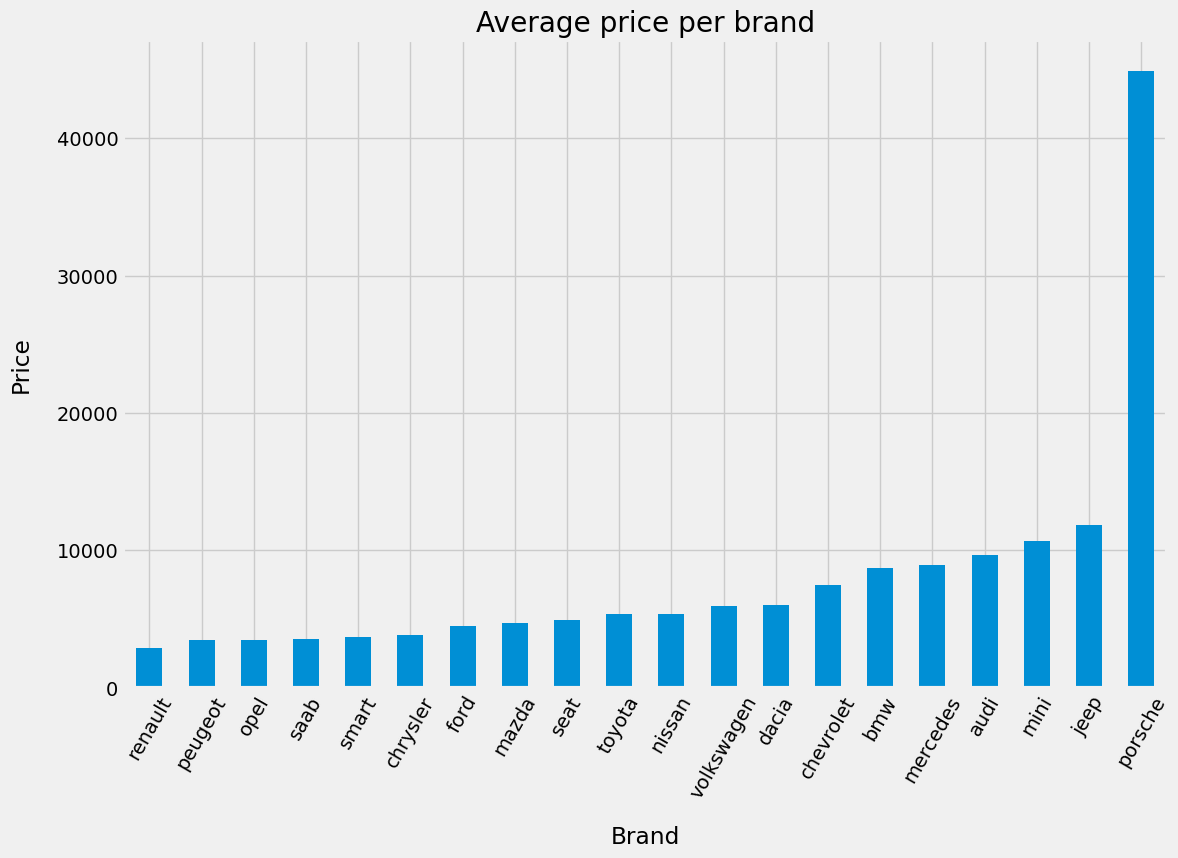

In [58]:
plt.style.use('fivethirtyeight')
fig = plt.subplots(figsize =(12, 8))

autos_20.groupby('brand')['price'].mean().sort_values().plot.bar(rot=60)

plt.title('Average price per brand')
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    ) 
plt.xlabel("Brand", labelpad=17)
plt.ylabel("Price", labelpad=17)
plt.show()
plt.style.use('default')


<a id='repair221'></a>

# 2.2.1. Brands with unrepaired damage

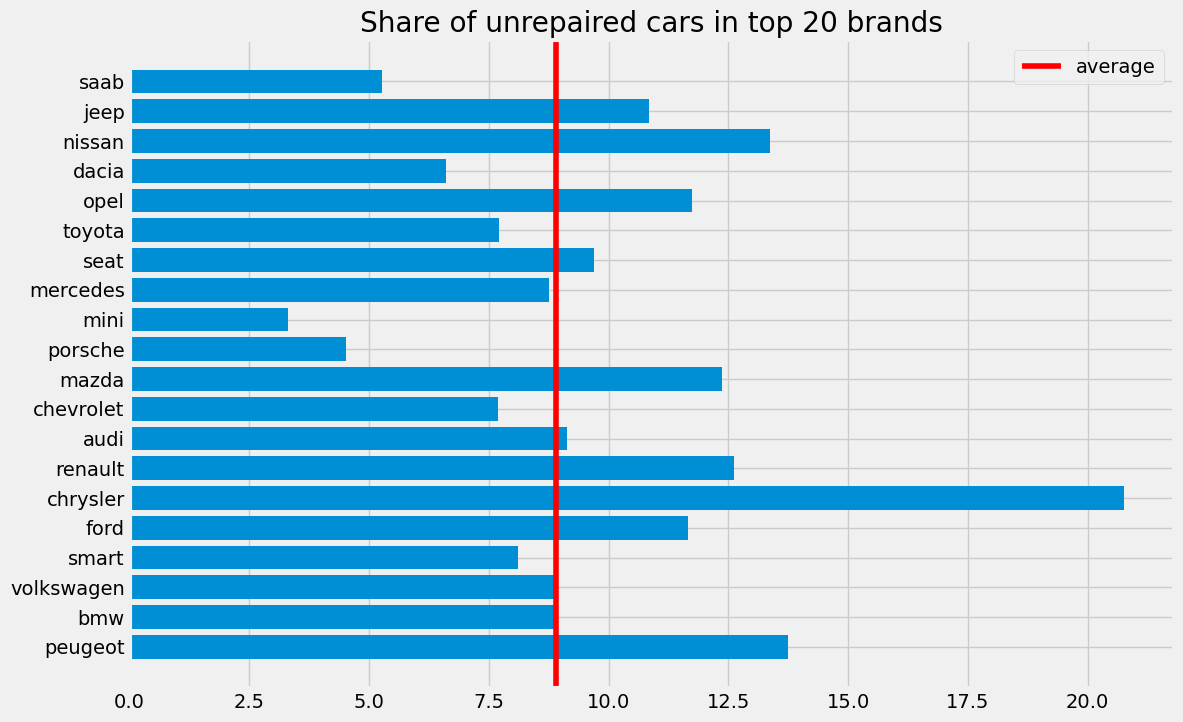

In [59]:
empty_dict3 = {}
brands = top20
for brand in brands:
    nine9 = autos_20["brand"] == brand
    prop = autos_20[nine9]["unrepaired_damage"].value_counts()[1] / autos_20[nine9]["unrepaired_damage"].value_counts()[0]
    empty_dict3[brand] = prop * 100

brands_k = list(empty_dict3.keys())           
damage = list(empty_dict3.values()) 
plt.style.use('fivethirtyeight')
fig = plt.subplots(figsize =(12, 8))
plt.barh(brands_k, damage)

plt.title('Share of unrepaired cars in top 20 brands')

plt.axvline(autos_20["unrepaired_damage"].value_counts(normalize=True).values[1]*100, color='r', label='average')
plt.legend()
plt.show()
plt.style.use('default')

The opinion of terrible BMW drivers does not find any solid confirmation in our data. From the most popular 20 brands, the one with the biggest share in listed unrepaired vehicles is Chrysler. It's worth noting that this brand is one of the least popular ones in the top 20 brands. Thus the amount of their cars in the database is very small (145). **We can notice the standouts in brands with little unrepaired damage: Porsche, Mini and Saab.**

In [60]:
unrepaired = autos_20[autos_20['unrepaired_damage']=='ja'].groupby('brand')['price'].mean().sort_values(ascending=False)
repaired = autos_20[autos_20['unrepaired_damage']=='nein'].groupby('brand')['price'].mean().sort_values(ascending=False)
autos_20[autos_20['unrepaired_damage']=='nein']['price'].mean()

7569.294422595638

In [61]:
autos_20[autos_20['unrepaired_damage']=='ja']['price'].mean()

3006.0767543859647

In [62]:
avg_eng_size_brnd = power20.groupby('brand')['engine_size'].mean()
avg_power_brnd = autos_20.groupby('brand')['power'].mean()

In [63]:
avg_power_brnd.sort_values(ascending=False)[:20]

brand
porsche       308.560008
jeep          190.467720
bmw           176.064176
audi          168.965142
mercedes      167.470023
saab          161.501190
chrysler      159.001199
chevrolet     149.914496
mini          132.612291
mazda         122.618451
nissan        113.703054
ford          110.713107
volkswagen    110.085211
toyota        109.455216
opel          103.481883
peugeot       102.579028
seat          101.995068
renault        92.569072
dacia          89.278449
smart          62.990450
Name: power, dtype: float64

<a id='powerengine23'></a>

# 2.3. Power and engine size

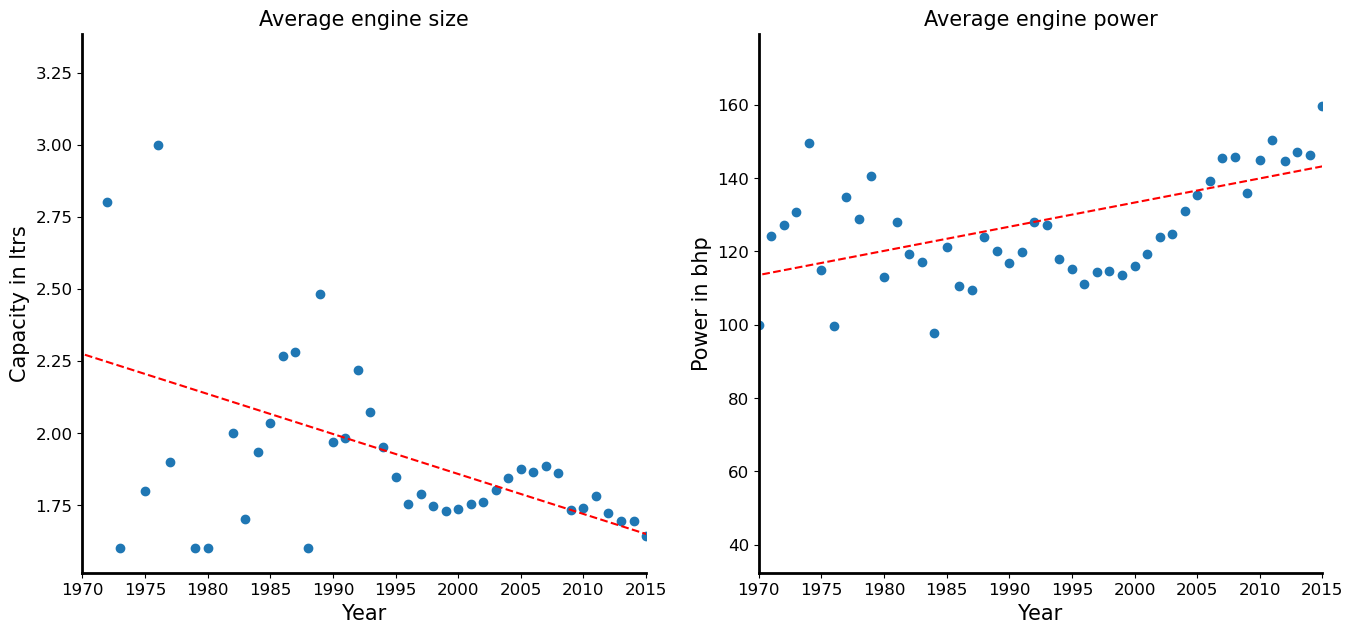

In [64]:
plt.style.use('default')
power_frame = power_frame[power_frame['registration_year']<=2015]
avg_eng_size = power20.groupby('registration_year')['engine_size'].mean()
avg_power = power20.groupby('registration_year')['power'].mean()

fig, ax = plt.subplots(figsize=(16, 7))

ax1 = plt.subplot(121)
plt.scatter(avg_eng_size.index.tolist(), avg_eng_size)
plt.title('Average engine size' , size=15)
plt.ylabel('Capacity in ltrs', size=15)
x = avg_eng_size.index.tolist()
y = avg_eng_size
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

ax2 = plt.subplot(122)
all_cars = autos.groupby('registration_year')['power'].mean()
plt.scatter(all_cars.index.tolist(), all_cars)
plt.title('Average engine power', size=15)
plt.ylabel('Power in bhp', size=15)
x = all_cars.index.tolist()
y = all_cars
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

axes = [ax1, ax2]
for ax in axes:
    for location in [ 'right', 'top']:
            ax.spines[location].set_visible(False)
    for location in [ 'left', 'bottom']:
            ax.spines[location].set_linewidth(2)   
    ax.tick_params(labelsize=12)
    ax.set_xlim(1970,2015)
    ax.set_xlabel('Year',size=15)

plt.show()

As mentioned before, the amount of data before 1990 is very limited. We can see lack of trend on both charts before 1990. We must also take notice that in most cases, only the high-end cars from before 1990 are still up and running and listed in this database. From 1990 we can observe a clear pattern. **As time passes the average engine size is getting smaller, at the same time we can see an increase in power.** Which leads to an obvious conclusion:

<a id='efficient24'></a>

## 2.4. Are engines becoming more efficient?
To answer that question we'll create a new column called 'power_ef' (for power efficient). It will represent how much power can an engine deliver per its size. Small and powerfull engines will have the highest values in this column.

In [65]:

power_frame['power_ef'] = power_frame['power'] / power_frame['engine_size'].copy()
power_frame['power_ef'] = power_frame['power_ef'].astype(float).copy()
power_frame['power_ef'].describe()

count    13977.000000
mean        67.627731
std         14.960854
min         18.487185
25%         57.500000
50%         66.250000
75%         72.666667
max        205.555556
Name: power_ef, dtype: float64

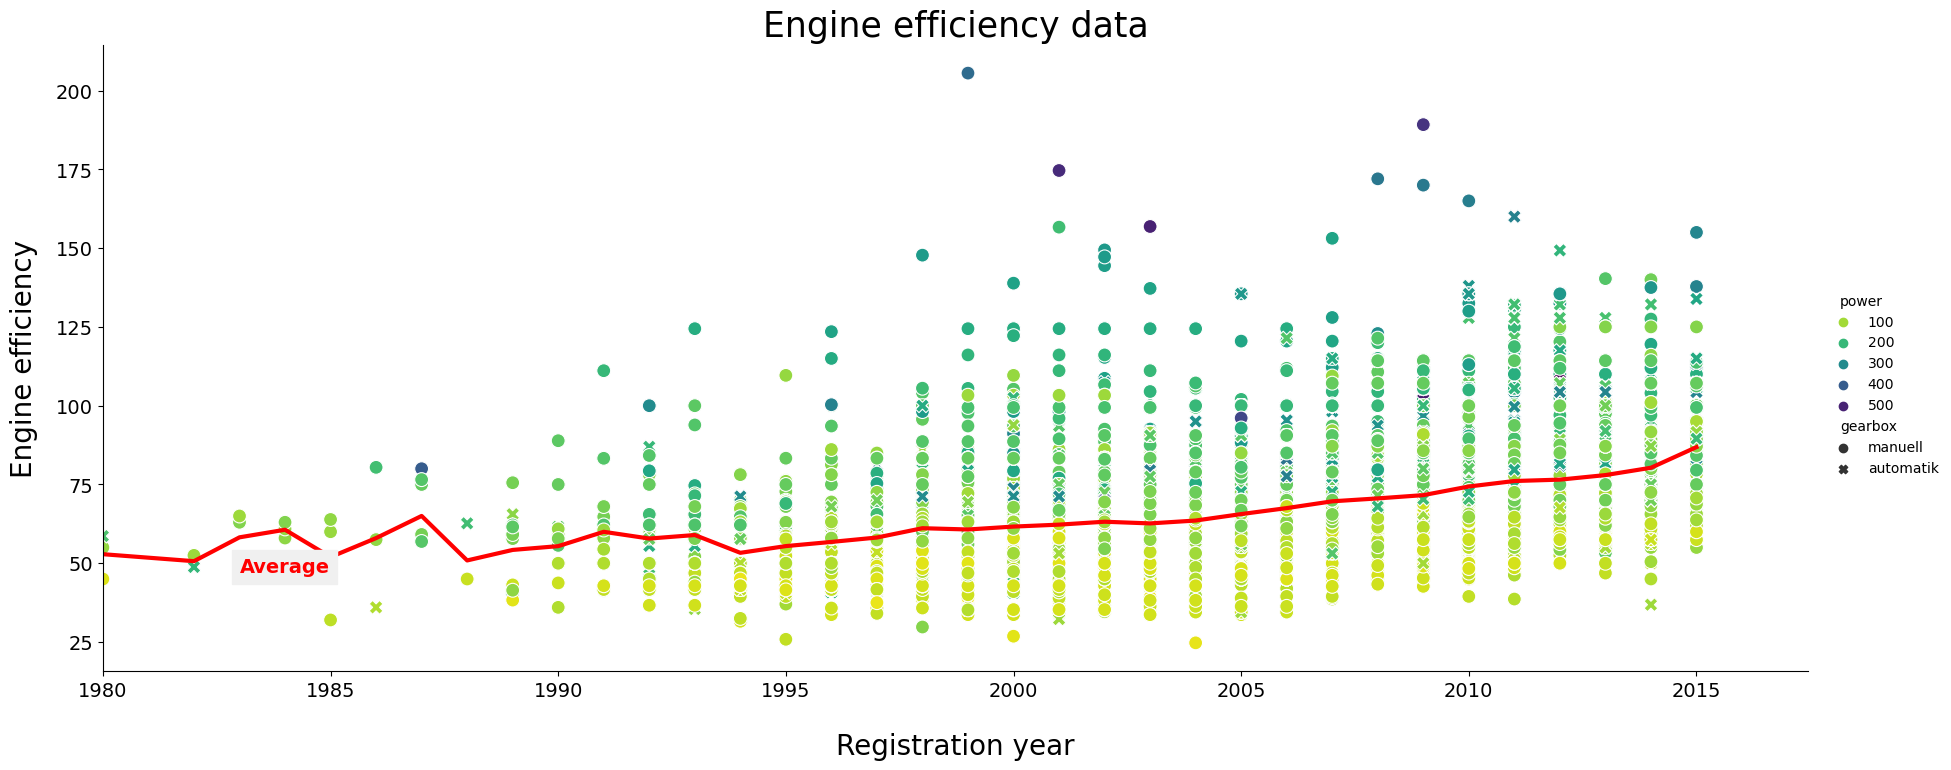

In [66]:

sns.relplot(data=power_frame, s=100, x='registration_year', y='power_ef', style="gearbox", hue="power",palette='viridis_r', height=7, aspect=18/7)
plt.plot(power_frame.groupby('registration_year')['power_ef'].mean(), label='average', linewidth=3, color='r')
plt.xlim(1980)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(x = 1983, y = 47, s = 'Average', color ='r', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0',  fontsize=14)
plt.xlabel('Registration year', fontsize=20, labelpad=23)
plt.ylabel('Engine efficiency', fontsize=20, labelpad=13)
plt.title('Engine efficiency data', size=25)
plt.show()

Throughout the years we can see an improvement in the amount of power delivered from the engine. We can clearly see the bottom end in every year moving up year by year. We can also notice that engine efficiency is corelated with it's power. The more powerfull the engine, the more efficient it is. An interesting finding, considering that usually the smallest engines seek to be branded as economic.

<a id='models241'></a>

# 2.4.1. Which models are the most power efficient?
We can clearly see few examples that are standing out from the rest of the population. Lets have a look at their names, and engines. My bet is all of them have big turbochargers.

In [67]:
power_frame.sort_values('power_ef', ascending=False).head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer,registration_month,fuel,brand,unrepaired_damage,ad_created,postal_code,last_seen,engine_size,power_ef
496,2016-03-26,Audi_TT_8N_Coupe_1.8_T_RS_Tuning_370_PS_und_52...,12500.0,test,coupe,1999,manuell,370.0,tt,150000.0,8,benzin,audi,NaN,2016-03-26,28199,2016-03-26,1.8,205.555556
41782,2016-03-25,Ford_Focus_2.5_RS,20950.0,control,limousine,2009,manuell,473.0,focus,150000.0,10,benzin,ford,nein,2016-03-25,42349,2016-03-30,2.5,189.200000
22973,2016-03-26,Volkswagen_Golf_2.8_V6_4Motion_Turbo__no_R32_g...,15999.0,control,limousine,2001,manuell,489.0,golf,150000.0,9,benzin,volkswagen,nein,2016-03-26,31177,2016-03-26,2.8,174.642857
34647,2016-04-02,Seat_Leon_2.0_T_FSI_Cupra__344PS_,15000.0,test,limousine,2008,manuell,344.0,leon,125000.0,6,benzin,seat,nein,2016-04-02,71384,2016-04-06,2.0,172.000000
26052,2016-03-21,Seat_Leon_2.0_T_FSI_Cupra,12000.0,test,limousine,2009,manuell,340.0,leon,125000.0,6,benzin,seat,nein,2016-03-21,89073,2016-04-06,2.0,170.000000


As seen above, the engines that can squeeze the most amount of power per engine capacity all belong to sporty hot-hatchbacks (Audi TT is technicaly a Coupe, but it's based on a golf platform). All of these cars don't have huge engines, but the power they deliver is way above average for their size. Most of them are representatives of middle-value brands.

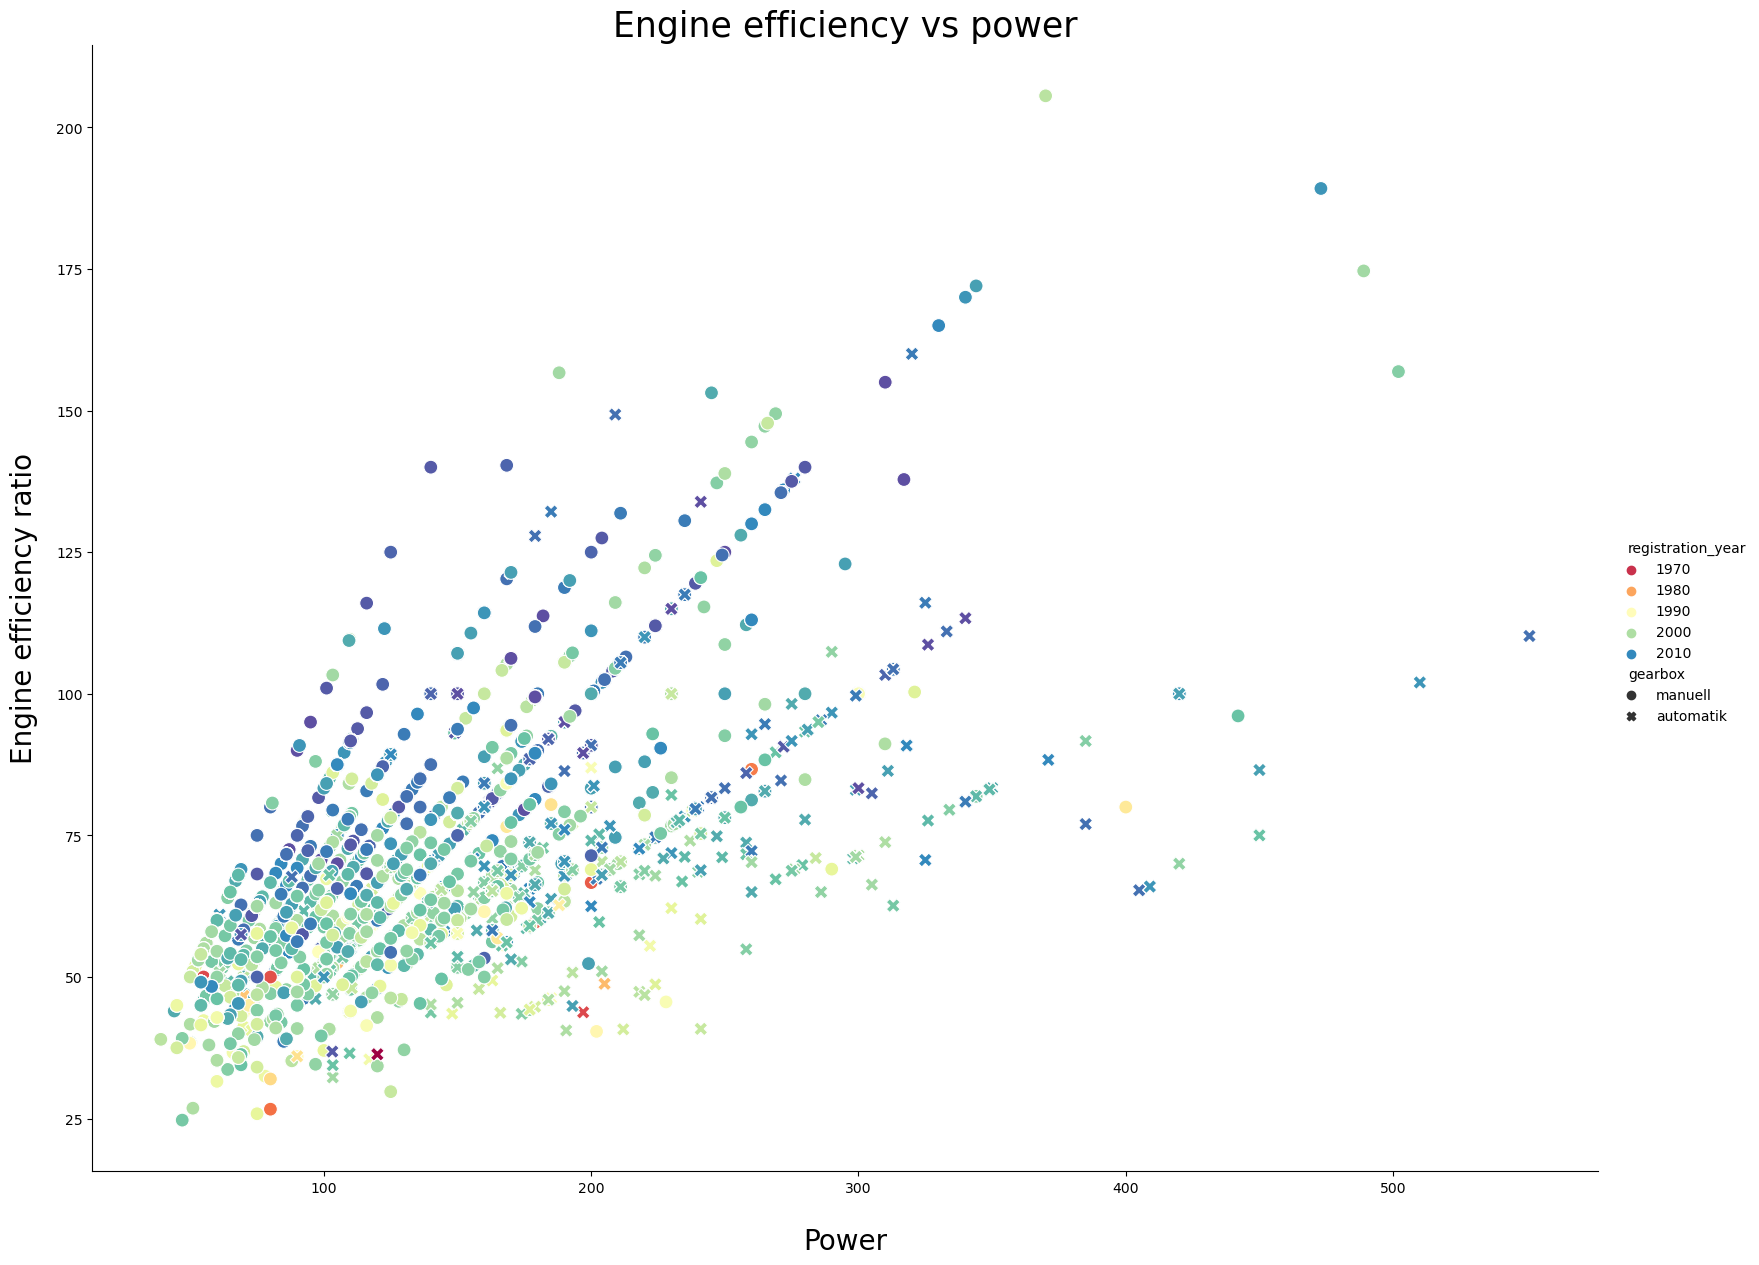

In [68]:
sns.relplot(data=power_frame, s=100, x='power', y='power_ef', style="gearbox", hue="registration_year",  palette='Spectral', height=12, aspect=20/15)
plt.xlabel('Power', fontsize=20, labelpad=23)
plt.ylabel('Engine efficiency ratio', fontsize=20, labelpad=13)
plt.title('Engine efficiency vs power', size=25)
plt.show()


We can see a correlation between engines power and its efficiency. Naturally the less efficient are the oldest models. Automatic gearbox is becoming more popular as the power increases.

<a id='gearbox25'></a>

# 2.5. Gearbox

In [ ]:
sns.relplot(data=autos, x='registration_year', y='price', hue="gearbox", height=12)
plt.ylim(0,100000)
plt.xlim(1960,2020)
plt.title('Price vs year')
plt.show()

In [ ]:
efm_cars = power_frame[power_frame['gearbox']=='manuell'].groupby('registration_year')['power_ef'].mean()
efa_cars = power_frame[power_frame['gearbox']=='automatik'].groupby('registration_year')['power_ef'].mean()
fig, ax = plt.subplots(figsize=(16, 7))

plt.scatter(efm_cars.index.tolist(), efm_cars, label='Manual gearbox')
plt.scatter(efa_cars.index.tolist(), efa_cars, label='Automatic gearbox')
plt.legend()
plt.title('Engine efficiency vs gearbox type')
plt.xlabel("Year")
plt.ylabel('Efficiency ratio')
for location in [ 'right', 'top']:
            ax.spines[location].set_visible(False)
plt.show()


Gearbox is a very important component in a car, it has a big impact on how efficiently the engine delivers power to the wheels. Historically, manual gearboxes where better at almost everything, but as technology progresses... We can observe continuos improvement in automatic gearboxes. It is obvious they've surpassed the manual gearboxes at the start of the century.

<a id='location26'></a>

# 2.6.&nbsp;Location

Database contains almost 7000 postcodes, which covers about 80% of Germanys postcodes. We'll try to plot this data on a map. To start with, we'll need a shapefile of Germany with postal codes. Quick google search led us to this site: https://www.suche-postleitzahl.org/downloads

From the above site, we'll download the desired shapefile (plz-gebiete.shp).

In [ ]:
autos.groupby('postal_code')['price'].mean().sort_values()

In [ ]:
data = gpd.read_file('plz-gebiete.shp') 
autos['postal_code'] = autos['postal_code'].apply(lambda x: '{0:0>5}'.format(x))
price_post = autos.groupby('postal_code')['price'].mean()
data['avg_price'] = None
def wha(code):
    if code in price_post:
        return price_post[code]
    else:
        None
data['avg_price'] = data['plz'].apply(wha)
data['avg_price'] = np.where((data['avg_price'].isnull()==True),autos['price'].mean() ,data['avg_price'])
data_below_100 = data[data['avg_price']<100000]
#found this nice piece of code on stackoverflow, 
# when I was looking up 'Plotted map from shape file seems distorted':
map_1 = data_below_100.to_crs({'init' :'epsg:25832'})

map_1.plot(column="avg_price", figsize=(12,12),cmap="gist_ncar", legend=True, 
                    legend_kwds={'label': "Average price"})
plt.show()

The average price data plotted on Germanys map present the richest regions in the south. We can see higher average prices in and around big cities. As we travel further north, the average price drops, with a few exceptions (cities).

<a id='last27'></a>

# 2.7. Conclusions

In [ ]:
sns.relplot(data=autos, s=100, x='registration_year', y='price', style="gearbox", hue="power", palette='viridis_r',  height=12, aspect=20/15)
plt.ylim(0,70000)
plt.xlim(1965,2020)
plt.title('Brand')
#plt.xticks(rotation=45)
plt.show()

**Lets point out the obvious facts, confirmed by our analysis:**
* price value is corelated to brand, , power, engine size, mileage, gearbox type etc.
* the price value is positively corelated with:
    * power
    * engine size
    * registration year
    * automatix gearbox and lack of unrepaired damage are also important factors affecting price value
* the price value is negatively corelated with:
    * mileage

**Analyzing the values for power and engine size over the years, paints an interesting picture:**
* Average car power values have been increasing over the years
* At the same time engine size was getting smaller 
    * Engines are becoming much more efficient in delivering power from their volume
    * The smaller engines (though more fuel efficient) are less efficient in power delivery per volume, than the bigger engines
* Percantage of cars with automatic gearbox is on the rise, majority of modern cars have an automatic gearbox
    * historically manual gearbox was more efficient in power delivery, but with improvements over time automatic gearbox surpassed it (around the beggining of new millennium)
    * cars with powerfull engines usually have an automatic gearbox
* More expensive cars are popular in the southern parts of Germany, usually concentrated around urban areas


